In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

/Users/lucaswang/PycharmProjects/ASLDetector/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 30

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 30)                330       
                                                                 
Total params: 1400 (5.47 KB)
Trainable params: 1400 (5.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 [======>.......................] - ETA: 0s - loss: 3.4243 - accuracy: 0.0469
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 34ms/step - loss: 3.4302 - accuracy: 0.0385 - val_loss: 3.3847 - val_accuracy: 0.0769
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 3.4282 - accuracy: 0.0547
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 5ms/step - loss: 3.4153 - accuracy: 0.0491 - val_loss: 3.3810 - val_accuracy: 0.0641
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 3.4133 - accuracy: 0.0547
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 5ms/step - loss: 3.4080 - accuracy: 0.0449 - val_loss: 3.3790 - val_accuracy: 0.0705
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 3.3987 - accuracy: 0.0312
Epoch 4: savin

/Users/lucaswang/PycharmProjects/ASLDetector/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/4 [======>.......................] - ETA: 0s - loss: 3.3611 - accuracy: 0.0391
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 5ms/step - loss: 3.3559 - accuracy: 0.0556 - val_loss: 3.3662 - val_accuracy: 0.0385
Epoch 14/1000
1/4 [======>.......................] - ETA: 0s - loss: 3.3822 - accuracy: 0.0234
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 5ms/step - loss: 3.3613 - accuracy: 0.0427 - val_loss: 3.3634 - val_accuracy: 0.0385
Epoch 15/1000
1/4 [======>.......................] - ETA: 0s - loss: 3.3623 - accuracy: 0.0547
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 5ms/step - loss: 3.3644 - accuracy: 0.0534 - val_loss: 3.3597 - val_accuracy: 0.0385
Epoch 16/1000
1/4 [======>.......................] - ETA: 0s - loss: 3.3615 - accuracy: 0.0547
Epoch 16: saving model

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 1.3660 - accuracy: 0.6090


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 35ms/step
[3.4083616e-09 1.5348188e-13 2.8744650e-01 2.3715163e-02 3.9620878e-07
 1.4281626e-04 4.0913892e-10 3.0076131e-07 3.1382442e-07 6.4478961e-08
 1.7165406e-09 3.6902854e-06 8.5319876e-08 1.4011714e-06 9.1477017e-15
 6.1918868e-08 6.4735523e-06 4.1429211e-09 9.4045016e-10 1.9626340e-08
 1.2413395e-04 6.8855536e-01 1.4196192e-09 7.6913727e-07 7.3847031e-07
 1.0923852e-11 7.5076216e-11 1.1778623e-09 8.3298701e-08 1.5744600e-06]
21


# Confusion matrix

5/5 [==============================] - 0s 532us/step


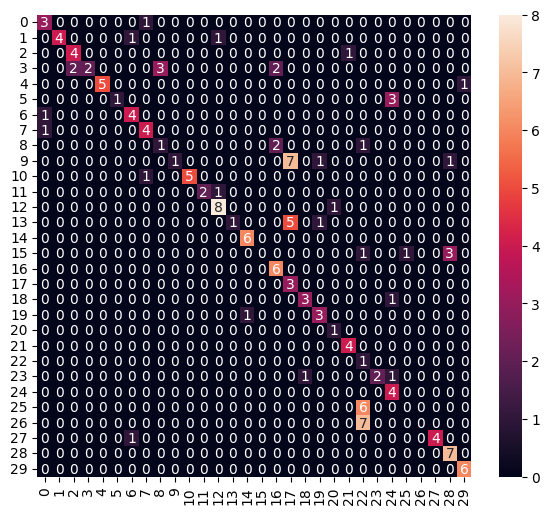

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      0.67      0.80         6
           2       0.67      0.80      0.73         5
           3       1.00      0.22      0.36         9
           4       1.00      0.83      0.91         6
           5       1.00      0.25      0.40         4
           6       0.67      0.80      0.73         5
           7       0.67      0.80      0.73         5
           8       0.25      0.25      0.25         4
           9       1.00      0.10      0.18        10
          10       1.00      0.83      0.91         6
          11       1.00      0.67      0.80         3
          12       0.80      0.89      0.84         9
          13       1.00      0.14      0.25         7
          14       0.86      1.00      0.92         6
          15       0.00      0.00      0.00         5
          16       0.60      1.00      0.75         6
     

/Users/lucaswang/PycharmProjects/ASLDetector/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucaswang/PycharmProjects/ASLDetector/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucaswang/PycharmProjects/ASLDetector/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/lucaswang/PycharmProjects/ASLDetector/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/jf/sdmg_g0s4z1_6hbmk58cbqzh0000gn/T/tmpff47oxm_/assets


INFO:tensorflow:Assets written to: /var/folders/jf/sdmg_g0s4z1_6hbmk58cbqzh0000gn/T/tmpff47oxm_/assets
2023-11-04 22:28:47.698907: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-04 22:28:47.698919: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-04 22:28:47.699329: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/jf/sdmg_g0s4z1_6hbmk58cbqzh0000gn/T/tmpff47oxm_
2023-11-04 22:28:47.699844: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-04 22:28:47.699849: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/jf/sdmg_g0s4z1_6hbmk58cbqzh0000gn/T/tmpff47oxm_
2023-11-04 22:28:47.701385: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-11-04 22:28:47.701964: I tensorflow/cc/saved_model/load

7688

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 187 µs, sys: 245 µs, total: 432 µs
Wall time: 234 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4083554e-09 1.5348191e-13 2.8744653e-01 2.3715151e-02 3.9620807e-07
 1.4281615e-04 4.0913820e-10 3.0076106e-07 3.1382416e-07 6.4478968e-08
 1.7165407e-09 3.6902820e-06 8.5319712e-08 1.4011703e-06 9.1477212e-15
 6.1918875e-08 6.4735473e-06 4.1429136e-09 9.4044861e-10 1.9626341e-08
 1.2413385e-04 6.8855542e-01 1.4196191e-09 7.6913659e-07 7.3846900e-07
 1.0923812e-11 7.5076230e-11 1.1778601e-09 8.3298552e-08 1.5744588e-06]
21
